<a href="https://colab.research.google.com/github/Techsavy3000/-Single-Objective-Minimisation-of-Charge-Consumption/blob/main/A1_Ranjandeep_a1909181_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are:

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [ ]:
!jupyter nbconvert --to pdf /content/UsingMachineLearningTools.ipynb


[NbConvertApp] WARNING | pattern '/content/UsingMachineLearningTools.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### **Importing** **required** **Lib**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page.

The data is stored in a CSV (comma separated values) file and contains the following information

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [ ]:
### Your code here
df = pd.read_csv('/content/SeoulBikeData.csv')

In [ ]:
# Print the column names
print(df.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:

# Display the first few rows of the dataframe
print(df.head())

# Check for unique values in the 'Hour' column
print(df['Hour'].unique())

# Print the column names to check for discrepancies
print(df.columns)


         Date  Rented Bike Count  Hour  Temperature (C)  Humidity (%)  \
0  01/12/2017                254     0             -5.2          37.0   
1  01/12/2017                204     1             -5.5          38.0   
2  01/12/2017                173     2             -6.0          39.0   
3  01/12/2017                107     3             -6.2          40.0   
4  01/12/2017                 78     4             -6.0          36.0   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

  Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm) Seasons     Holiday  \
0                       0            0             0  Winter  No Holiday   


In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78,100,181,460,930,490
Hour,0,1,2,3,4,5,6,7,8,9
Temperature (C),-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5
Humidity (%),37.0,38.0,39.0,40.0,36.0,37.0,35.0,38.0,37.0,27.0
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928
Dew point temperature (C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4
Solar Radiation (MJ/m2),0,0,0,0,0,0,0,0,0.01,0.23
Rainfall(mm),0,0,0,0,0,0,0,0,0,0


In [ ]:
summary = df.describe(include='all')
print(summary)

              Date  Rented Bike Count         Hour  Temperature (C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         714.876027    11.500000        12.945765   
std            NaN        1160.468927     6.922582        12.376168   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1066.000000    17.250000        22.500000   
max            NaN       90997.000000    23.000000       195.000000   

        Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
count    8760.000000       8760.000000       8760.000000   
unique           NaN       

**Data Visualization**

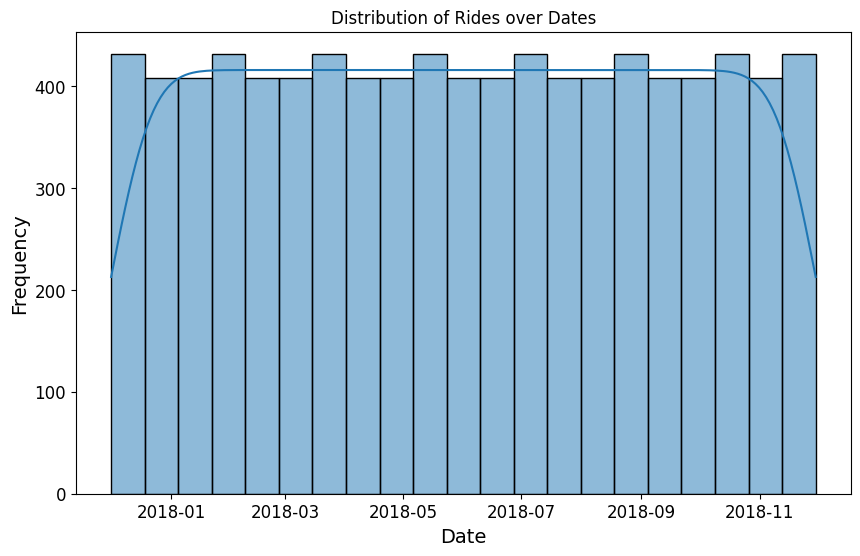

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Plot Date - histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Date'], kde=True)
plt.title('Distribution of Rides over Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


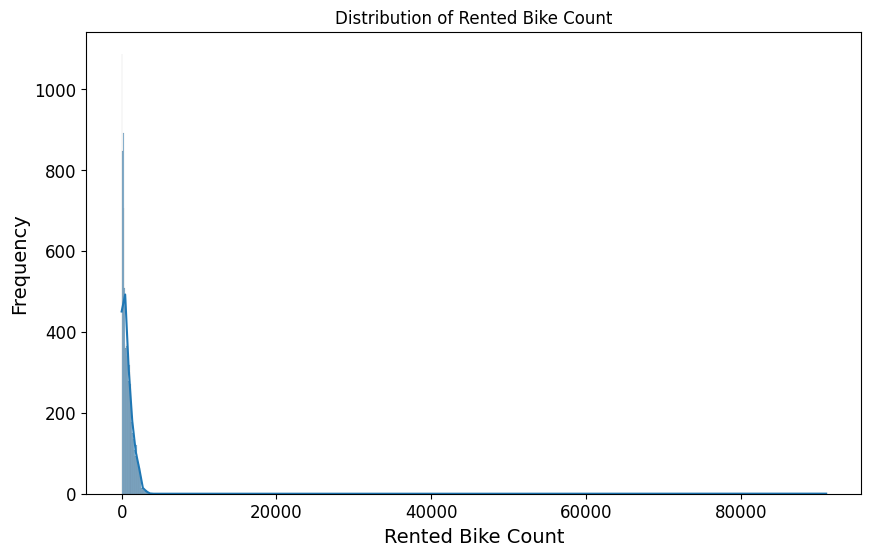

In [ ]:
# Plot Rented Bike Count - histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()


**Since the outliers is not clear i have ploted a Box plot where the outlies is easy to identify**

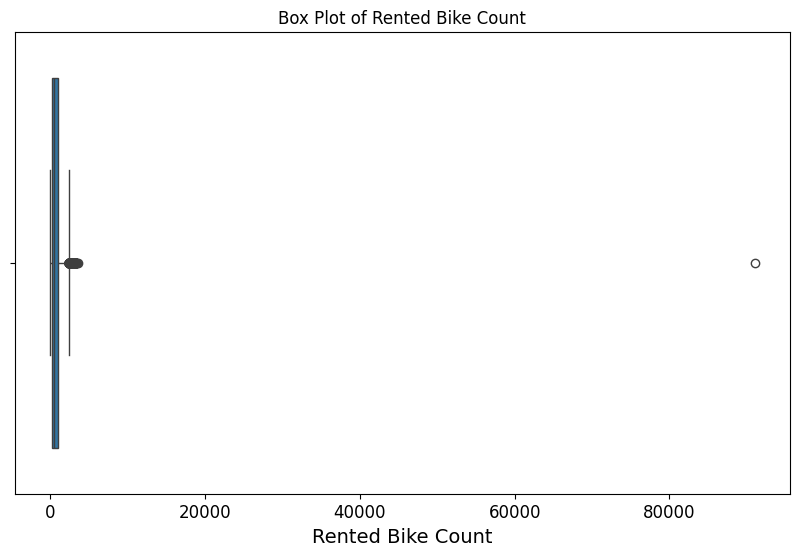

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Rented Bike Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rented Bike Count'])
plt.title('Box Plot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.show()


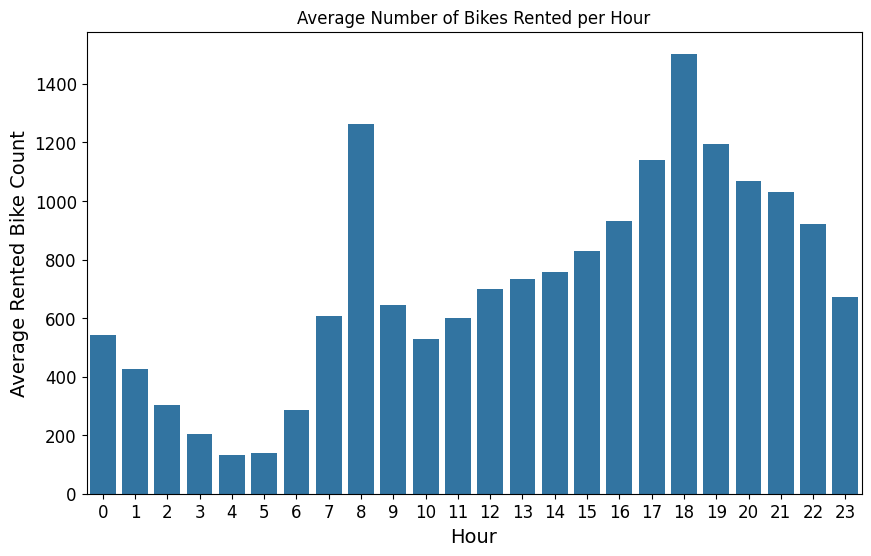

In [ ]:
# Average number of bikes rented per hour
avg_bike_count_per_hour = df.groupby('Hour')['Rented Bike Count'].mean()

# Plot the average number of bikes rented per hour
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_bike_count_per_hour.index, y=avg_bike_count_per_hour.values)
plt.title('Average Number of Bikes Rented per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.show()


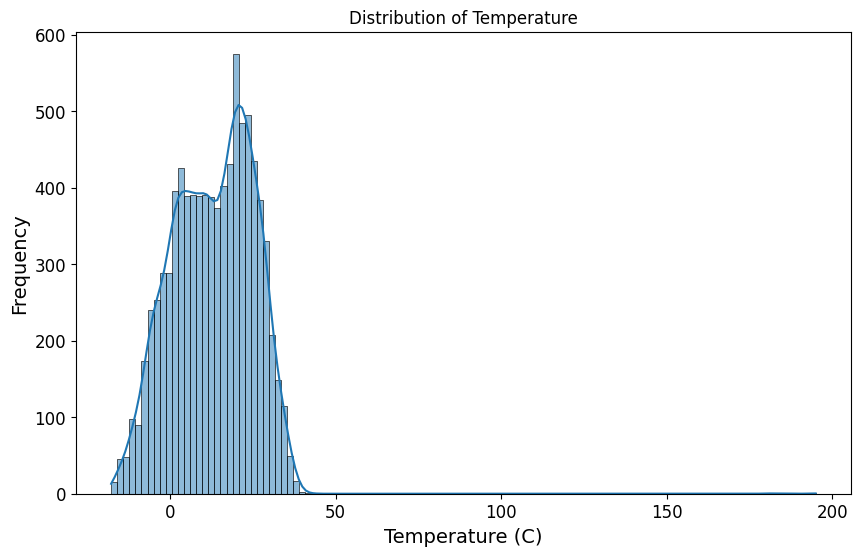

In [ ]:
# Plot Temperature (C) - histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature (C)'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()


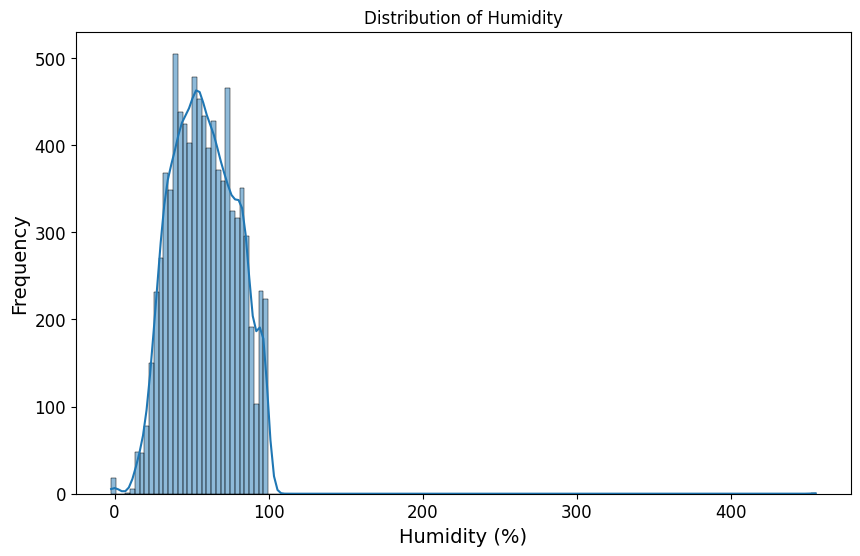

In [ ]:
# Plot Humidity (%) - histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity (%)'], kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()


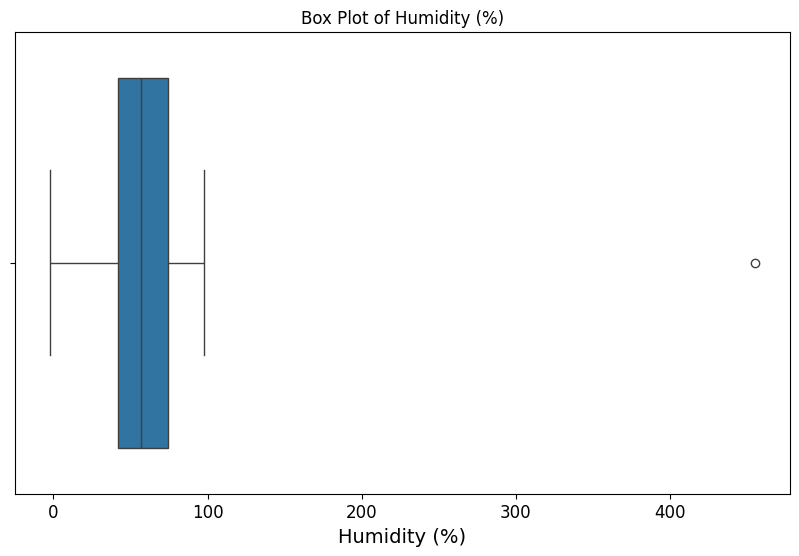

In [ ]:
#Box plot foe Humidity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Humidity (%)'])
plt.title('Box Plot of Humidity (%)')
plt.xlabel('Humidity (%)')
plt.show()

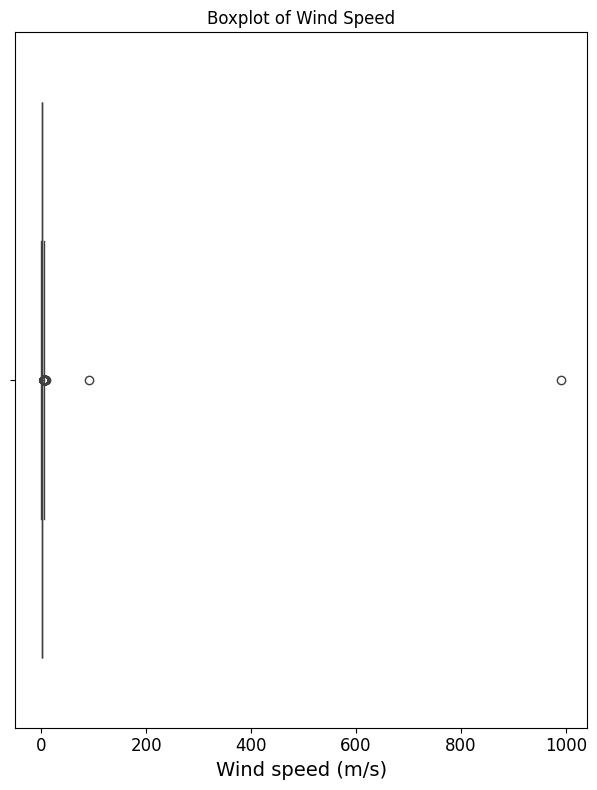

In [ ]:
# Plot box plot for wind speed
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Wind speed (m/s)')
plt.title('Boxplot of Wind Speed')
plt.xlabel('Wind speed (m/s)')

plt.tight_layout()
plt.show()


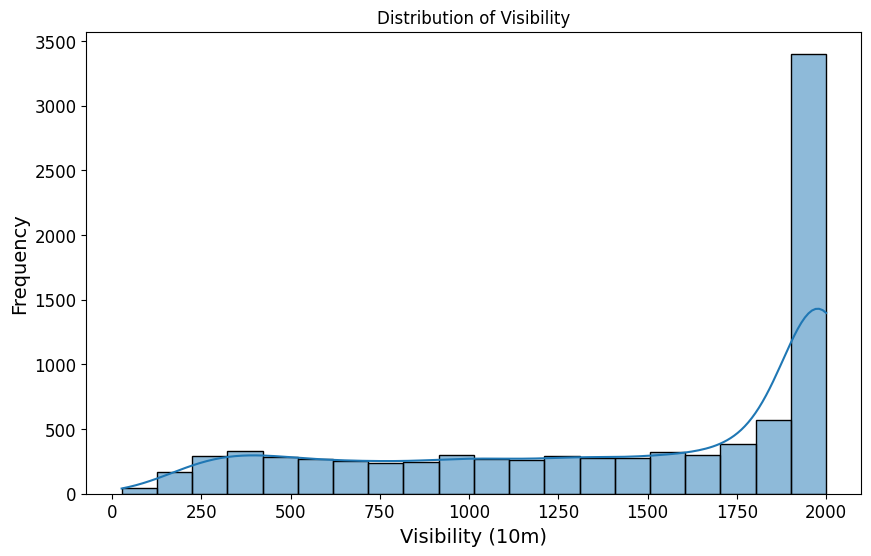

In [ ]:
# Plot Visibility (10m) - histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Visibility (10m)'], kde=True)
plt.title('Distribution of Visibility')
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.show()


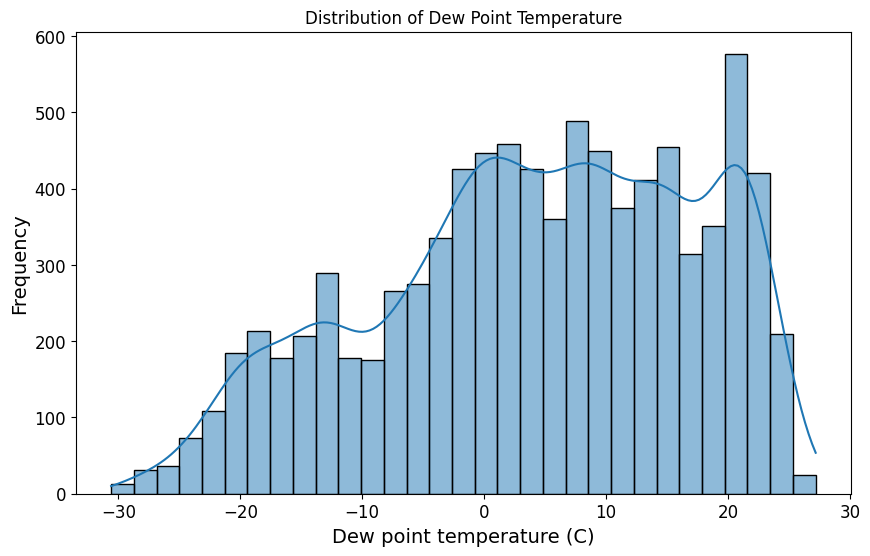

In [ ]:
# Plot Dew point temperature (C) - histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Dew point temperature (C)'], kde=True)
plt.title('Distribution of Dew Point Temperature')
plt.xlabel('Dew point temperature (C)')
plt.ylabel('Frequency')
plt.show()


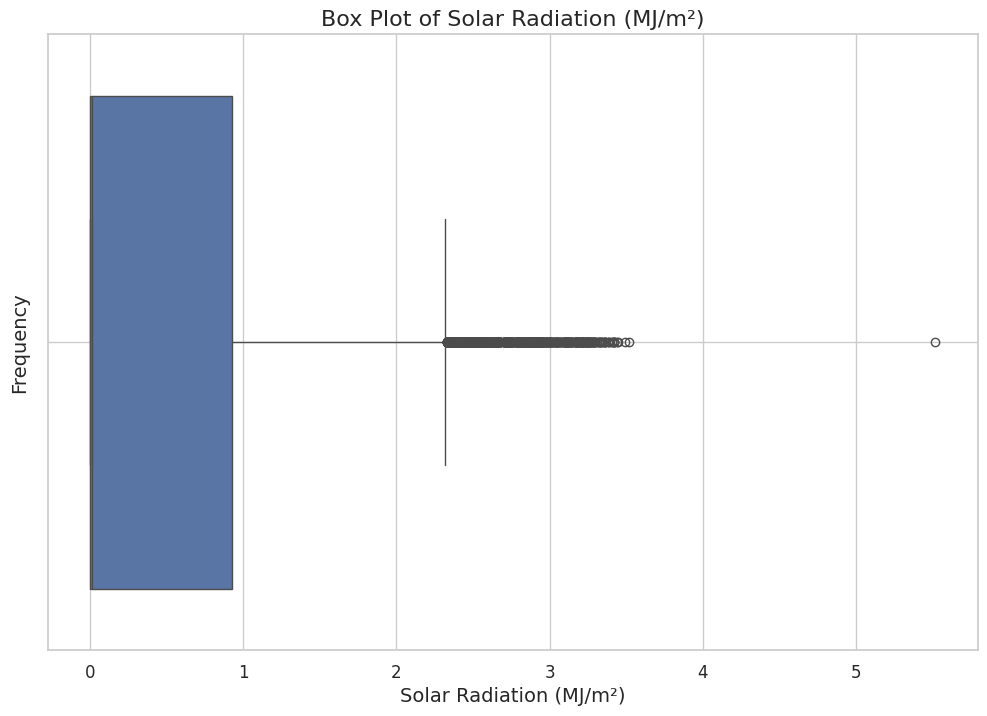

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Solar Radiation (MJ/m2)', data=df)

# Title and labels
plt.title('Box Plot of Solar Radiation (MJ/m²)', fontsize=16)
plt.xlabel('Solar Radiation (MJ/m²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)  # Assuming y-axis represents frequency

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(True)

# Show plot
plt.show()

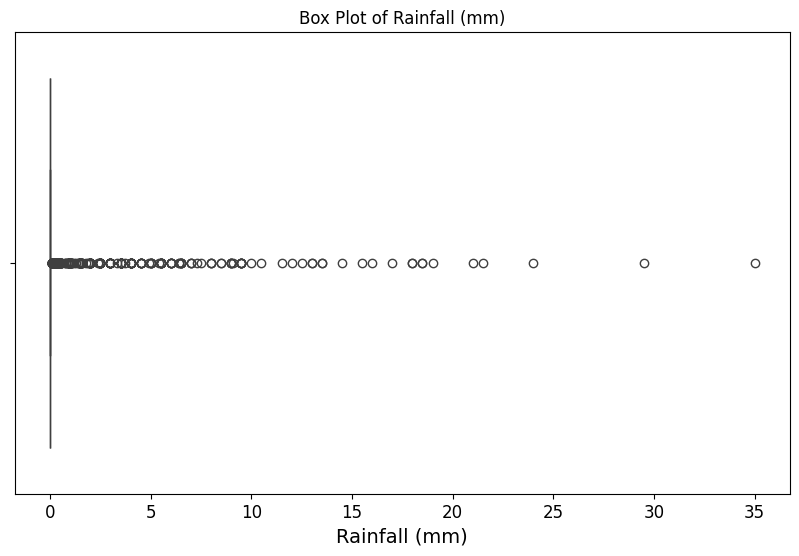

In [ ]:
plt.figure(figsize=(10, 6))
# Create the box plot for rainfall
sns.boxplot(x='Rainfall(mm)', data=df)
plt.title('Box Plot of Rainfall (mm)')
plt.xlabel('Rainfall (mm)')

# Display the plot
plt.show()


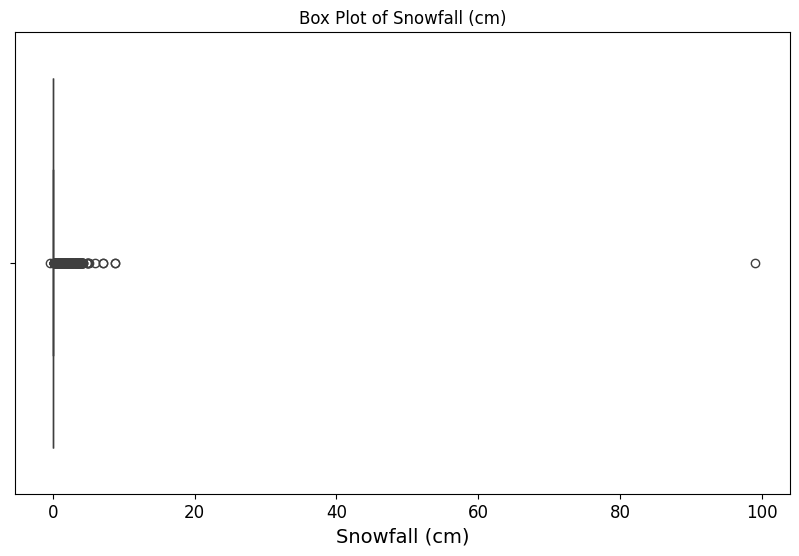

In [ ]:

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the box plot for Snowfall (cm)
sns.boxplot(x='Snowfall (cm)', data=df)
plt.title('Box Plot of Snowfall (cm)')
plt.xlabel('Snowfall (cm)')

# Display the plot
plt.show()


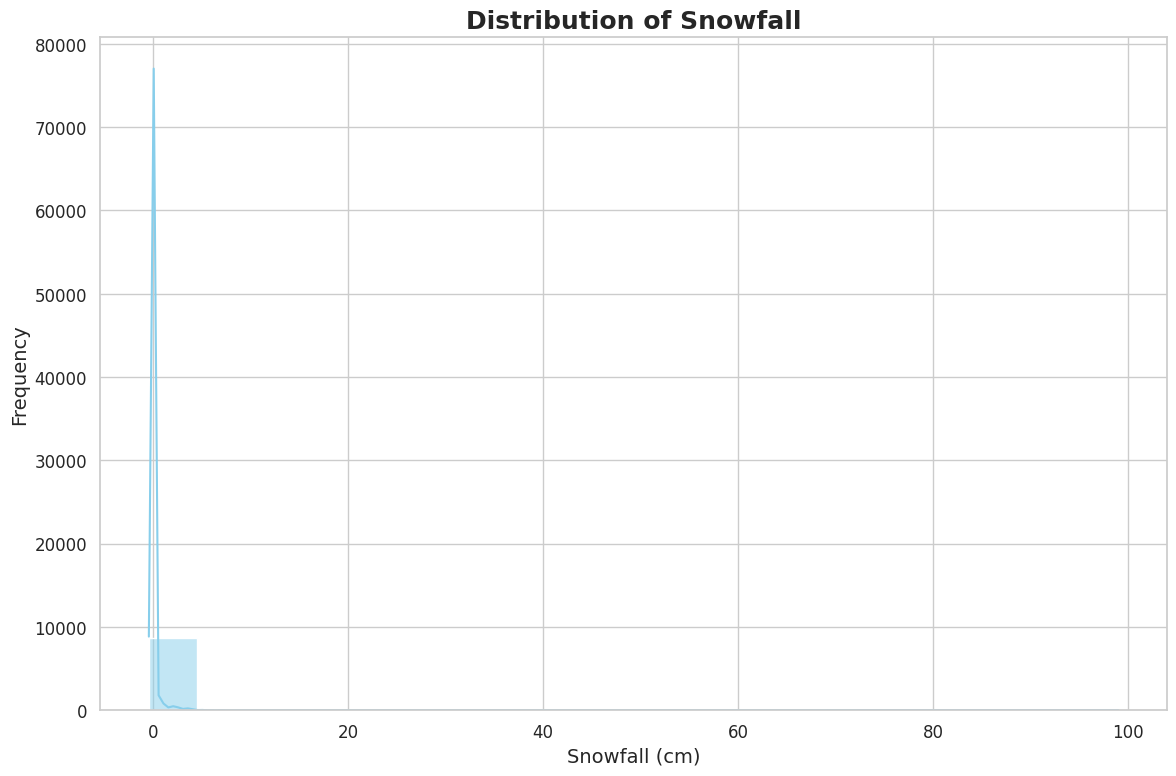

In [ ]:
# Set up the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=1.2)

# Create the histogram with KDE (Kernel Density Estimate)
sns.histplot(df['Snowfall (cm)'], kde=True, bins=20, color='skyblue')

# Title and labels
plt.title('Distribution of Snowfall', fontsize=18, fontweight='bold')
plt.xlabel('Snowfall (cm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

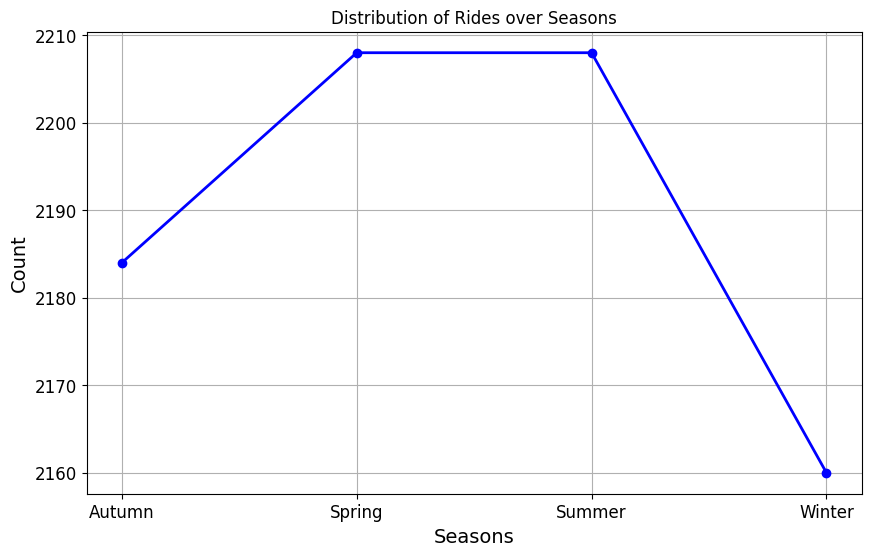

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate counts of rides per season
season_counts = df['Seasons'].value_counts().sort_index()

# Line plot
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='b', linewidth=2)

# Adding labels and title
plt.title('Distribution of Rides over Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')

# Customize x-axis ticks to show all seasons
plt.xticks(range(len(season_counts.index)), season_counts.index)

# Show grid lines for better readability
plt.grid(True)

plt.show()


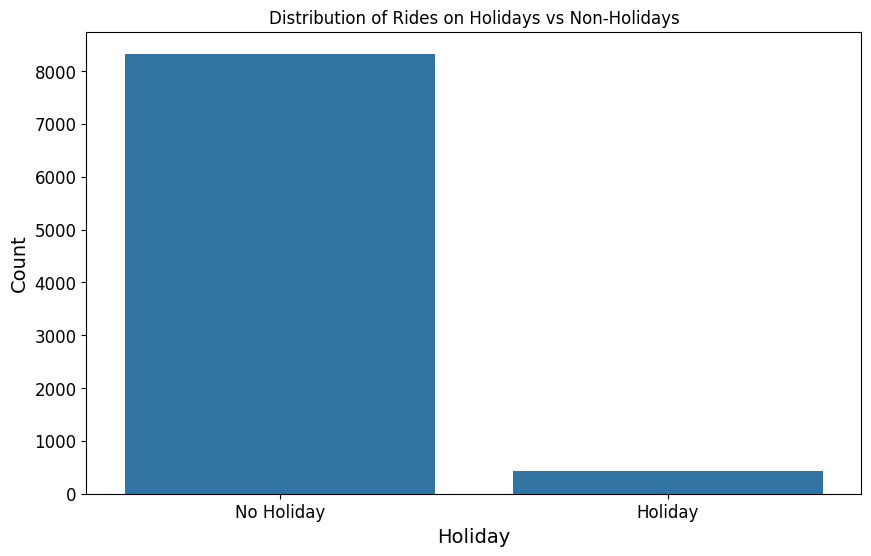

In [ ]:
# Plot Holiday - count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Holiday', data=df)
plt.title('Distribution of Rides on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()


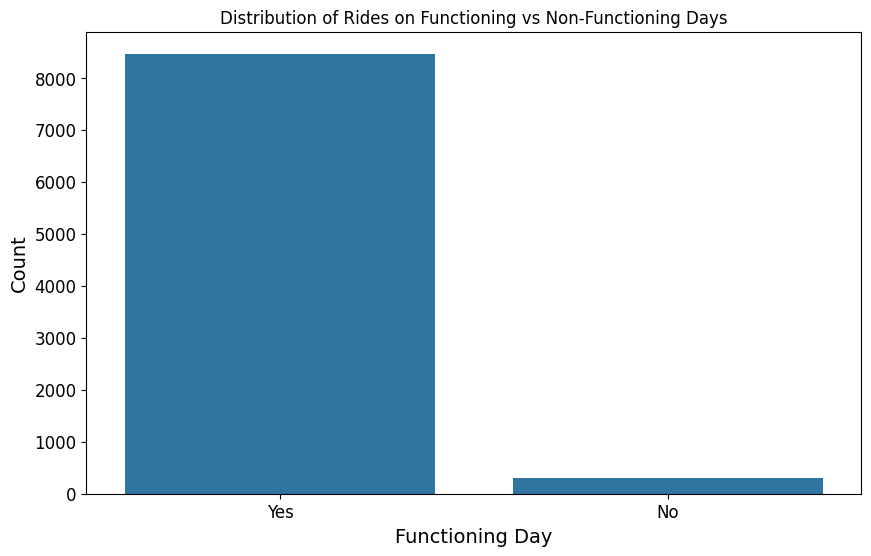

In [ ]:
# Plot Functioning Day - count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Functioning Day', data=df)
plt.title('Distribution of Rides on Functioning vs Non-Functioning Days')
plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.show()


### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [ ]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [ ]:
# Remove rows where the business is closed
df = df[df['Functioning Day'] == 'Yes']
df = df.drop(columns=['Functioning Day'])

In [ ]:
df = pd.read_csv('/content/SeoulBikeData.csv')

# Display the first few rows of the dataset and the column names
print(df.head())
print(df.columns)
df.columns

         Date  Rented Bike Count  Hour  Temperature (C)  Humidity (%)  \
0  01/12/2017                254     0             -5.2          37.0   
1  01/12/2017                204     1             -5.5          38.0   
2  01/12/2017                173     2             -6.0          39.0   
3  01/12/2017                107     3             -6.2          40.0   
4  01/12/2017                 78     4             -6.0          36.0   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

  Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm) Seasons     Holiday  \
0                       0            0             0  Winter  No Holiday   


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns=['Seasons'], prefix='Season')

In [ ]:
# Convert the "Date" feature to a binary "Weekday" feature
def date_is_weekday(datestring):
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]), int(dsplit[1]), int(dsplit[0])).weekday()
    return int(wday <= 4)

In [ ]:
df['Weekday'] = df['Date'].apply(date_is_weekday)
df.drop(columns=['Date'], inplace=True)


In [ ]:
# Convert non-numerical features to numerical format
df['Holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)


In [ ]:
# Convert columns to numeric if necessary
df['Solar Radiation (MJ/m2)'] = pd.to_numeric(df['Solar Radiation (MJ/m2)'], errors='coerce')
df['Rainfall(mm)'] = pd.to_numeric(df['Rainfall(mm)'], errors='coerce')
df['Snowfall (cm)'] = pd.to_numeric(df['Snowfall (cm)'], errors='coerce')


In [ ]:
# Ensure all columns are numeric
numeric_columns = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)',
                   'Dew point temperature (C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [ ]:
import os
os.makedirs('/mnt/data', exist_ok=True)

# Save the cleaned data to a new CSV file
df.to_csv('/mnt/data/CleanedSeoulBikeData.csv', index=False)

In [ ]:
print("Data cleaning complete. Cleaned data saved to CleanedSeoulBikeData.csv")
# Display the first few rows of the cleaned dataset
print(df.head())

Data cleaning complete. Cleaned data saved to CleanedSeoulBikeData.csv
   Rented Bike Count  Hour  Temperature (C)  Humidity (%)  Wind speed (m/s)  \
0                254     0             -5.2          37.0               2.2   
1                204     1             -5.5          38.0               0.8   
2                173     2             -6.0          39.0               1.0   
3                107     3             -6.2          40.0               0.9   
4                 78     4             -6.0          36.0               2.3   

   Visibility (10m)  Dew point temperature (C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use 'most_frequent' for non-numeric columns
    ('scaler', StandardScaler())
])

# Pre-process the data
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Impute non-numeric columns with the most frequent value
# Force the imputed values to be of type 'object' (string) to ensure consistency
X[non_numeric_columns] = SimpleImputer(strategy='most_frequent').fit_transform(
    X[non_numeric_columns]).astype(object)

# Fit and transform the features (now all numeric)
X_preprocessed = pipeline.fit_transform(X.select_dtypes(include=['number']))

print("Pre-processing complete.")

Pre-processing complete.


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**.

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [ ]:
### Your code and outputs here
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate RMSE
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Baseline RMSE (mean of the training targets)
baseline_pred = np.mean(y_train)
baseline_rmse = np.sqrt(mean_squared_error(y_test, [baseline_pred] * len(y_test)))

print(f"RMSE of Linear Regression model on training data: {rmse_train}")
print(f"RMSE of Linear Regression model on test data: {rmse_test}")
print(f"Baseline RMSE: {baseline_rmse}")

RMSE of Linear Regression model on training data: 471.37371657319846
RMSE of Linear Regression model on test data: 2221.52517337216
Baseline RMSE: 2251.656822968517


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [ ]:
### Your ChatGPT prompt

#I need to create and run code using sklearn pipelines to fit a linear regression and a Support Vector Regression (SVR) method to the data using 10-fold cross-validation for each model.
#Display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets.
#Perform a hyper-parameter optimization on each model using GridSearch and display the mean and standard deviation of the RMSE values for each model (after optimization) in the appropriate datasets.
#Choose the best model and visualize the results with a single graphic of your choice.



Linear Regression baseline RMSE: 896.018131207578 (+/- 673.3438825915895)
SVR baseline RMSE: 907.4563554875376 (+/- 660.5266143111573)
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimized Linear Regression RMSE: 890.9344227248539 (+/- 670.2606428423263)
Results after each fold for Linear Regression:
Fold 1: RMSE = 1243013.4749394774
Fold 2: RMSE = 1256240.4756762362
Fold 3: RMSE = 1969298.7592775482
Fold 4: RMSE = 3993070.86837118
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimized SVR RMSE: 790.9039294016095 (+/- 716.6158917398986)
Results after each fold for SVR:
Fold 1: RMSE = 1217339.1524930852
Fold 2: RMSE = 1259772.4453280845
Fold 3: RMSE = 1217340.052829726
Fold 4: RMSE = 1259765.636292354
Fold 5: RMSE = 1221002.1354545525
Fold 6: RMSE = 1139067.3618370763
Fold 7: RMSE = 1221001.0694725201
Fold 8: RMSE = 1139069.8587029031
Best model: SVR


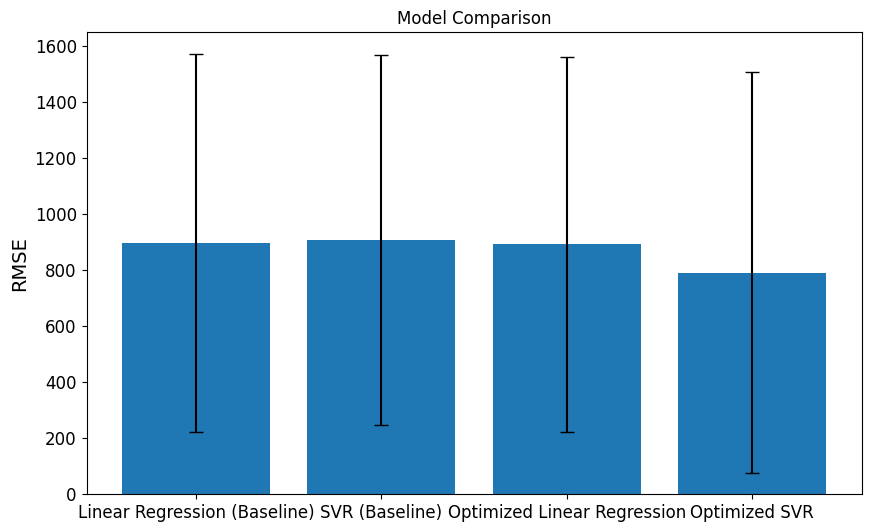

In [ ]:
# Import necessary libraries for model comparison and hyper-parameter optimization
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVR

# Function to calculate RMSE using cross-validation
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

# Linear Regression model baseline
linear_reg = LinearRegression()
linear_reg_rmse = rmse_cv(linear_reg, X_preprocessed, y)
print(f"Linear Regression baseline RMSE: {linear_reg_rmse.mean()} (+/- {linear_reg_rmse.std()})")

# Support Vector Regression (SVR) model baseline
svr = SVR()
svr_rmse = rmse_cv(svr, X_preprocessed, y)
print(f"SVR baseline RMSE: {svr_rmse.mean()} (+/- {svr_rmse.std()})")

# Hyper-parameter optimization for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Adding a different parameter to tune
}
random_search_lr = RandomizedSearchCV(LinearRegression(), param_distributions=param_grid_lr, n_iter=10, cv=5,
                                      scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
random_search_lr.fit(X_preprocessed, y)
lr_best_model = random_search_lr.best_estimator_
lr_best_rmse = rmse_cv(lr_best_model, X_preprocessed, y)
print(f"Optimized Linear Regression RMSE: {lr_best_rmse.mean()} (+/- {lr_best_rmse.std()})")

# Display results after each fold for Linear Regression
print(f"Results after each fold for Linear Regression:")
for i, score in enumerate(random_search_lr.cv_results_['mean_test_score']):
    print(f"Fold {i+1}: RMSE = {-score}")

# Hyper-parameter optimization for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10],
    'epsilon': [0.1, 0.2]
}
random_search_svr = RandomizedSearchCV(SVR(), param_distributions=param_grid_svr, n_iter=10, cv=5,
                                       scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
random_search_svr.fit(X_preprocessed, y)
svr_best_model = random_search_svr.best_estimator_
svr_best_rmse = rmse_cv(svr_best_model, X_preprocessed, y)
print(f"Optimized SVR RMSE: {svr_best_rmse.mean()} (+/- {svr_best_rmse.std()})")

# Display results after each fold for SVR
print(f"Results after each fold for SVR:")
for i, score in enumerate(random_search_svr.cv_results_['mean_test_score']):
    print(f"Fold {i+1}: RMSE = {-score}")

# Choose the best model
best_model = lr_best_model if lr_best_rmse.mean() < svr_best_rmse.mean() else svr_best_model
best_model_name = "Linear Regression" if best_model == lr_best_model else "SVR"
print(f"Best model: {best_model_name}")

# Visualize the results with a single graphic
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(['Linear Regression (Baseline)', 'SVR (Baseline)', 'Optimized Linear Regression', 'Optimized SVR'],
        [linear_reg_rmse.mean(), svr_rmse.mean(), lr_best_rmse.mean(), svr_best_rmse.mean()],
        yerr=[linear_reg_rmse.std(), svr_rmse.std(), lr_best_rmse.std(), svr_best_rmse.std()],
        capsize=5)
plt.ylabel('RMSE')
plt.title('Model Comparison')
plt.show()


## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [ ]:
### Your answer here (maximum of 200 words)


Making sure the data is scaled properly is really important when using Support Vector Regression (SVR). SVR is very sensitive to the scale of the data you give it. Even though there's already a StandardScaler in the pipeline, it's crucial to double-check that this scaling is working correctly within the GridSearchCV for SVR. This makes sure that when SVR is trying different parameter combinations during cross-validation, it's working with data that's been standardized. This helps give more accurate performance numbers and could lead to better predictions from the model. Checking the scaling during grid search helps avoid issues that can come up if the data isn't scaled properly. It shows a good understanding of how to set up machine learning models so they perform well and give reliable results, especially when dealing with different datasets. So, by getting the scaling right, SVR can be more effective at handling new data and making good predictions.